In [1]:
    if __name__ == '__main__':
        %reload_ext pidgin

In [2]:
    from IPython import get_ipython

In [3]:
    class shell_kernel:
        user=\
digraph {
    rankdir=LR
    User->Shell[label=tangle]
    Shell->Kernel[label=weave]
} 

        essay=\
digraph{
    rankdir=LR
    Text->Input[label=tangle]
    Input->Output[label=weave]
} 


        repl=\
digraph{
    rankdir=LR
    Read->Eval[label=tangle]
    Eval->Print[label=weave]
    Print->Read[style=dashed label=Loop]
} 

In [4]:
    import IPython, pidgin, nbconvert

In [5]:
    shell = IPython.get_ipython()

In [6]:
%%markdown_to_python
    from pathlib import Path
    def uml():
Use pylints pyreverse to create a uml diagram

from pathlib import Path
def uml():
    """Use pylints pyreverse to create a uml diagram""";

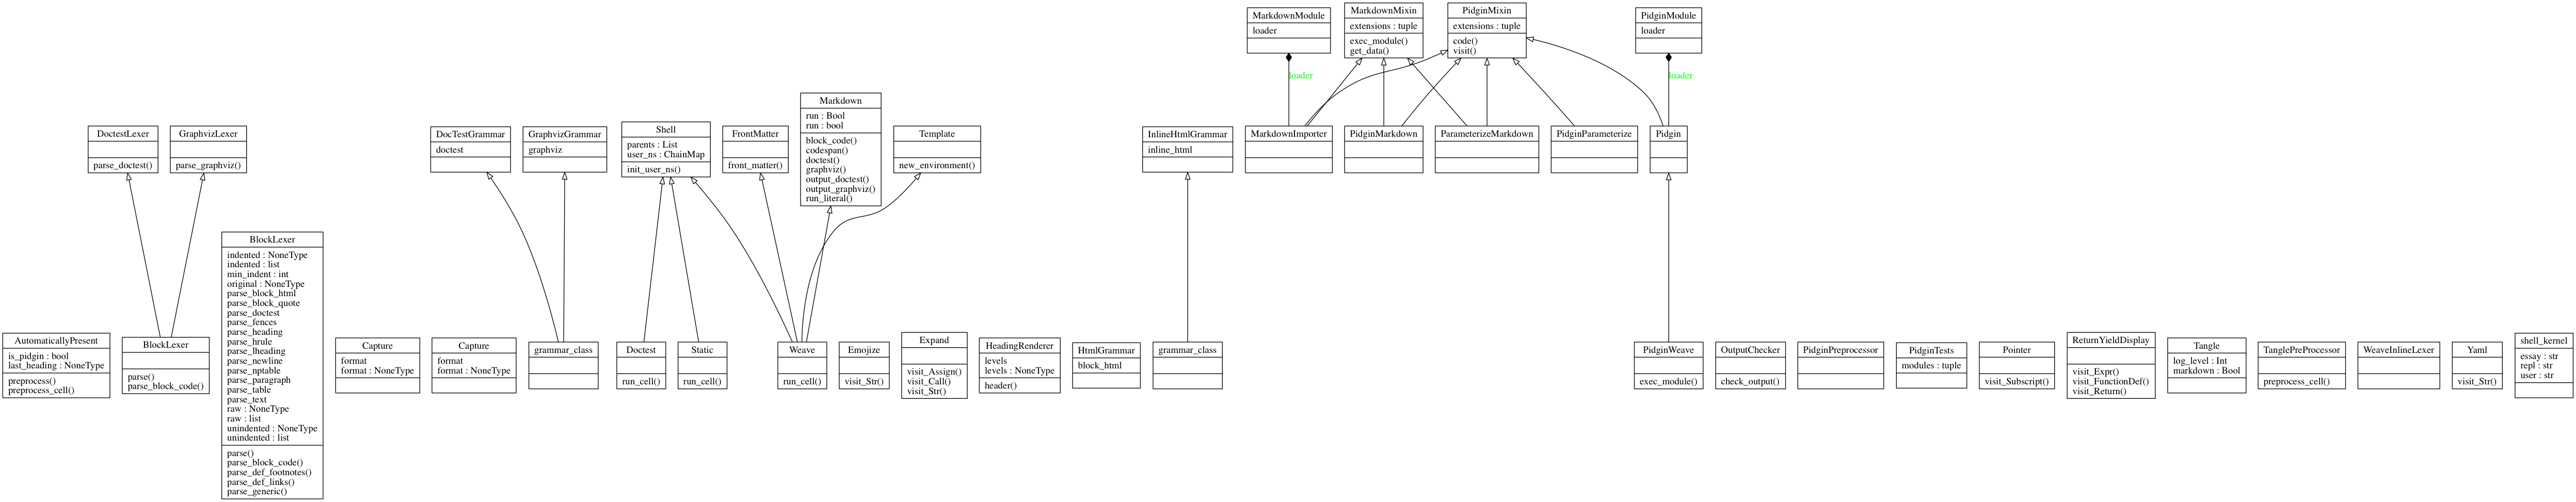

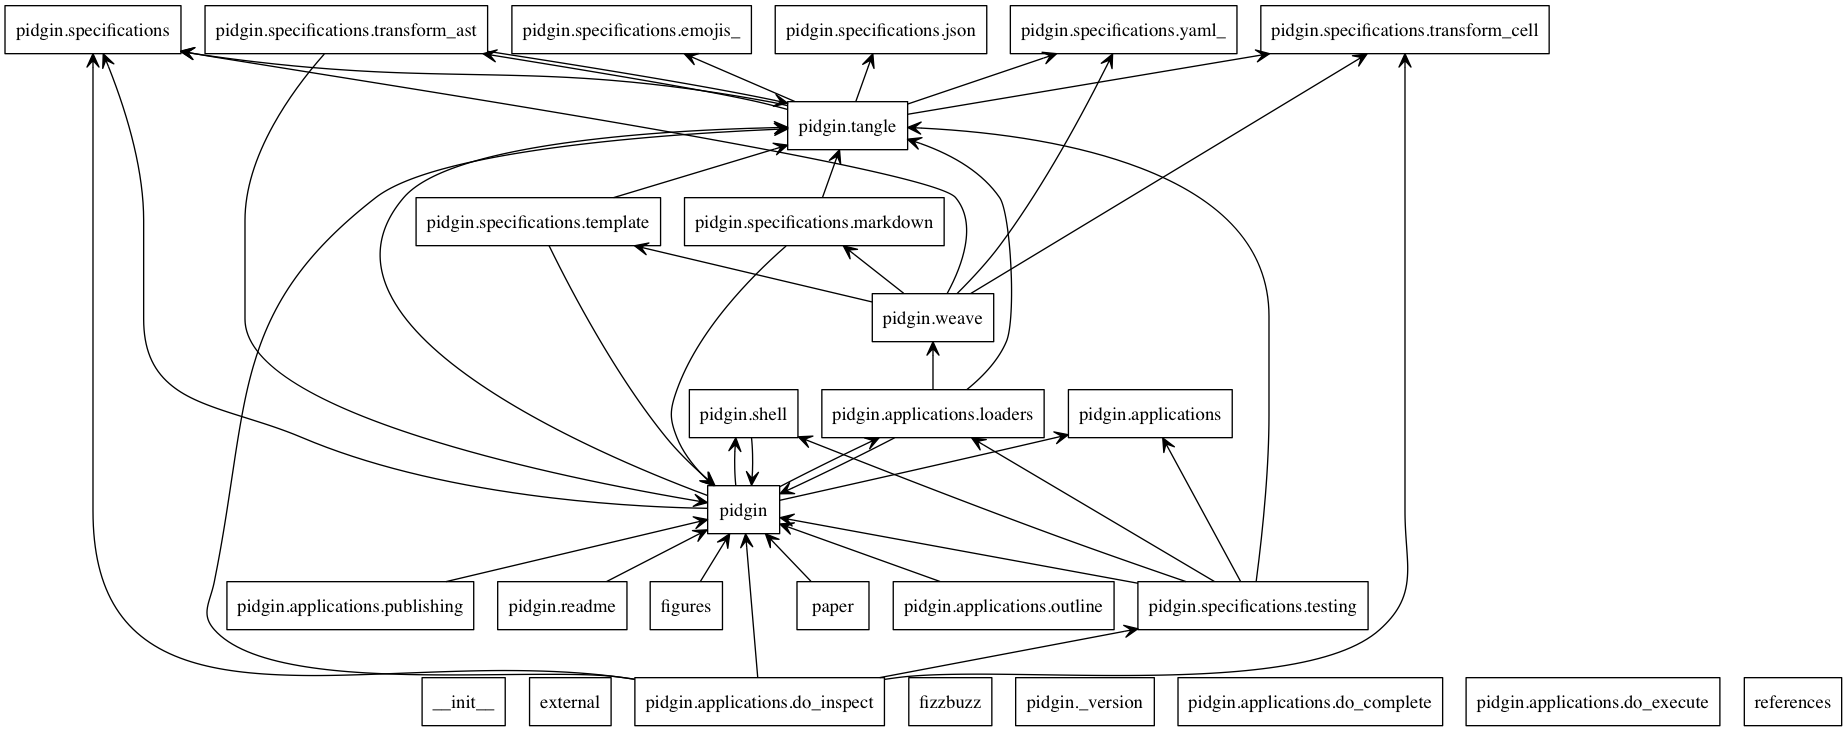

Error in callback <bound method Weave.run_cell of <pidgin.weave.Weave object at 0x10b262400>> (for post_run_cell):


AttributeError: 'Weave' object has no attribute 'output_list_end'

In [16]:
        
        files = []
        if __name__ == '__main__':    
111111. Loop through all of the notebooks in the `pidgin` project.
            
            for file in Path(pidgin.__file__).parent.glob('*.ipynb'):
                files.append(file.with_suffix('').with_suffix('').with_suffix('.py'))
111111. Export the notebook as valid python and save the file. make a slight modification because pyrevese doesnt like fstrings.
                
    
                files[-1].write_text(
                    nbconvert.PythonExporter(preprocessors=[pidgin.publishing.TanglePreProcessor()]).from_filename(file.absolute())[0].replace('F"', '"')
                )
111111. Apply pyreverse
        
            !source activate p6 && pyreverse pidgin -opng -ppidgin
111111. Clean up the python source files because we use notebooks as source for the time.

        
        list(map(__import__('os').remove, files))
        return IPython.display.Image('classes_pidgin.png'), IPython.display.Image('packages_pidgin.png')

    

In [8]:
    from pathlib import Path

parsing /Users/tonyfast/pidgin/src/pidgin/__init__.py...
parsing /Users/tonyfast/pidgin/src/pidgin/__init__.py...
parsing /Users/tonyfast/pidgin/src/pidgin/_version.py...
parsing /Users/tonyfast/pidgin/src/pidgin/readme.py...
parsing /Users/tonyfast/pidgin/src/pidgin/shell.py...
parsing /Users/tonyfast/pidgin/src/pidgin/tangle.py...
parsing /Users/tonyfast/pidgin/src/pidgin/weave.py...
parsing /Users/tonyfast/pidgin/src/pidgin/applications/__init__.py...
parsing /Users/tonyfast/pidgin/src/pidgin/applications/do_complete.py...
parsing /Users/tonyfast/pidgin/src/pidgin/applications/do_execute.py...
parsing /Users/tonyfast/pidgin/src/pidgin/applications/do_inspect.py...
parsing /Users/tonyfast/pidgin/src/pidgin/applications/loaders.py...
parsing /Users/tonyfast/pidgin/src/pidgin/applications/outline.py...
parsing /Users/tonyfast/pidgin/src/pidgin/applications/publishing.py...
parsing /Users/tonyfast/pidgin/src/pidgin/docs/__init__.py...
parsing /Users/tonyfast/pidgin/src/pidgin/docs/exter

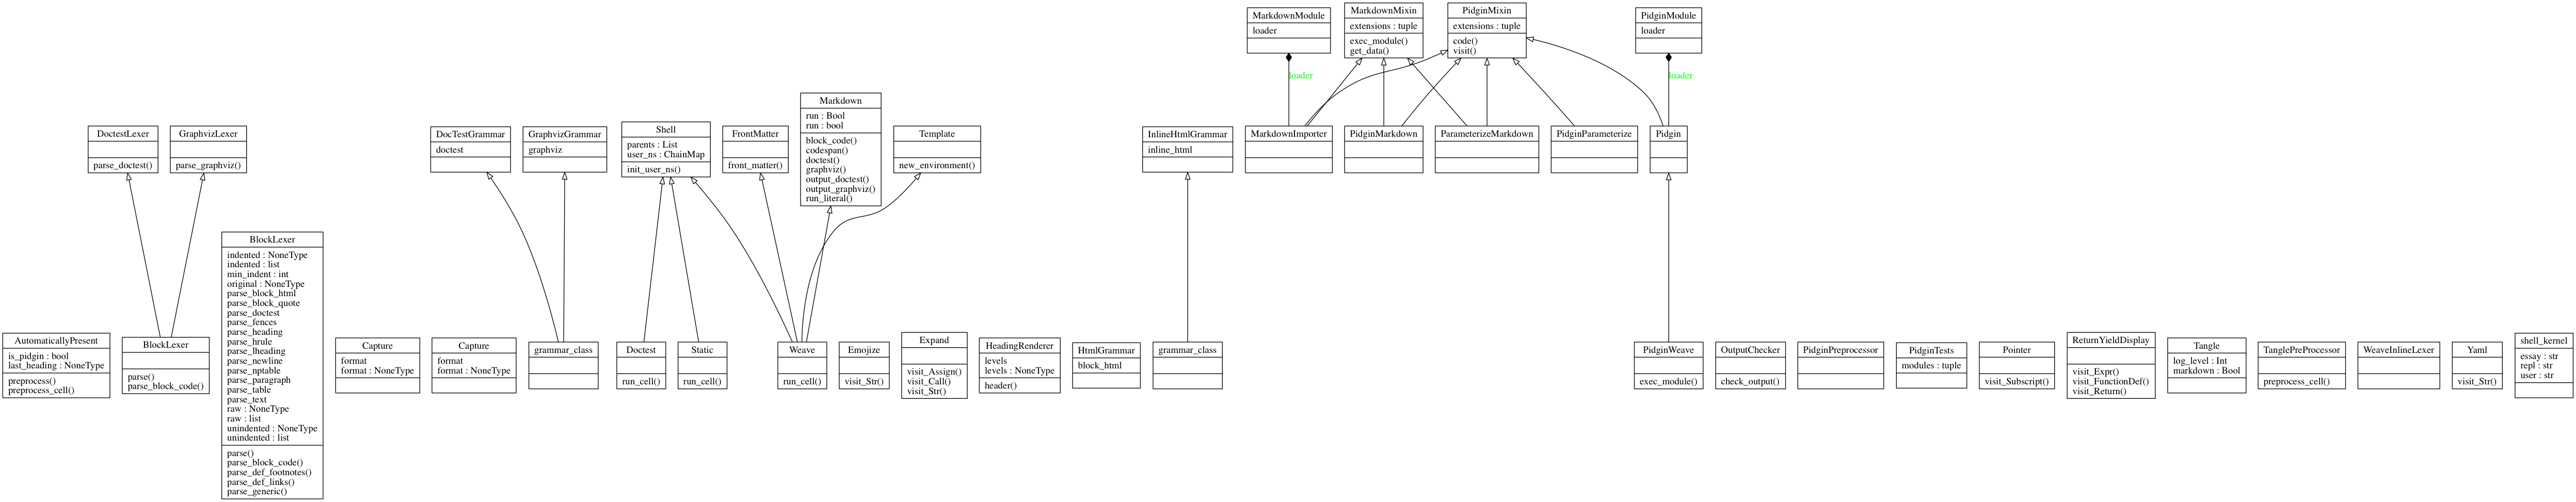

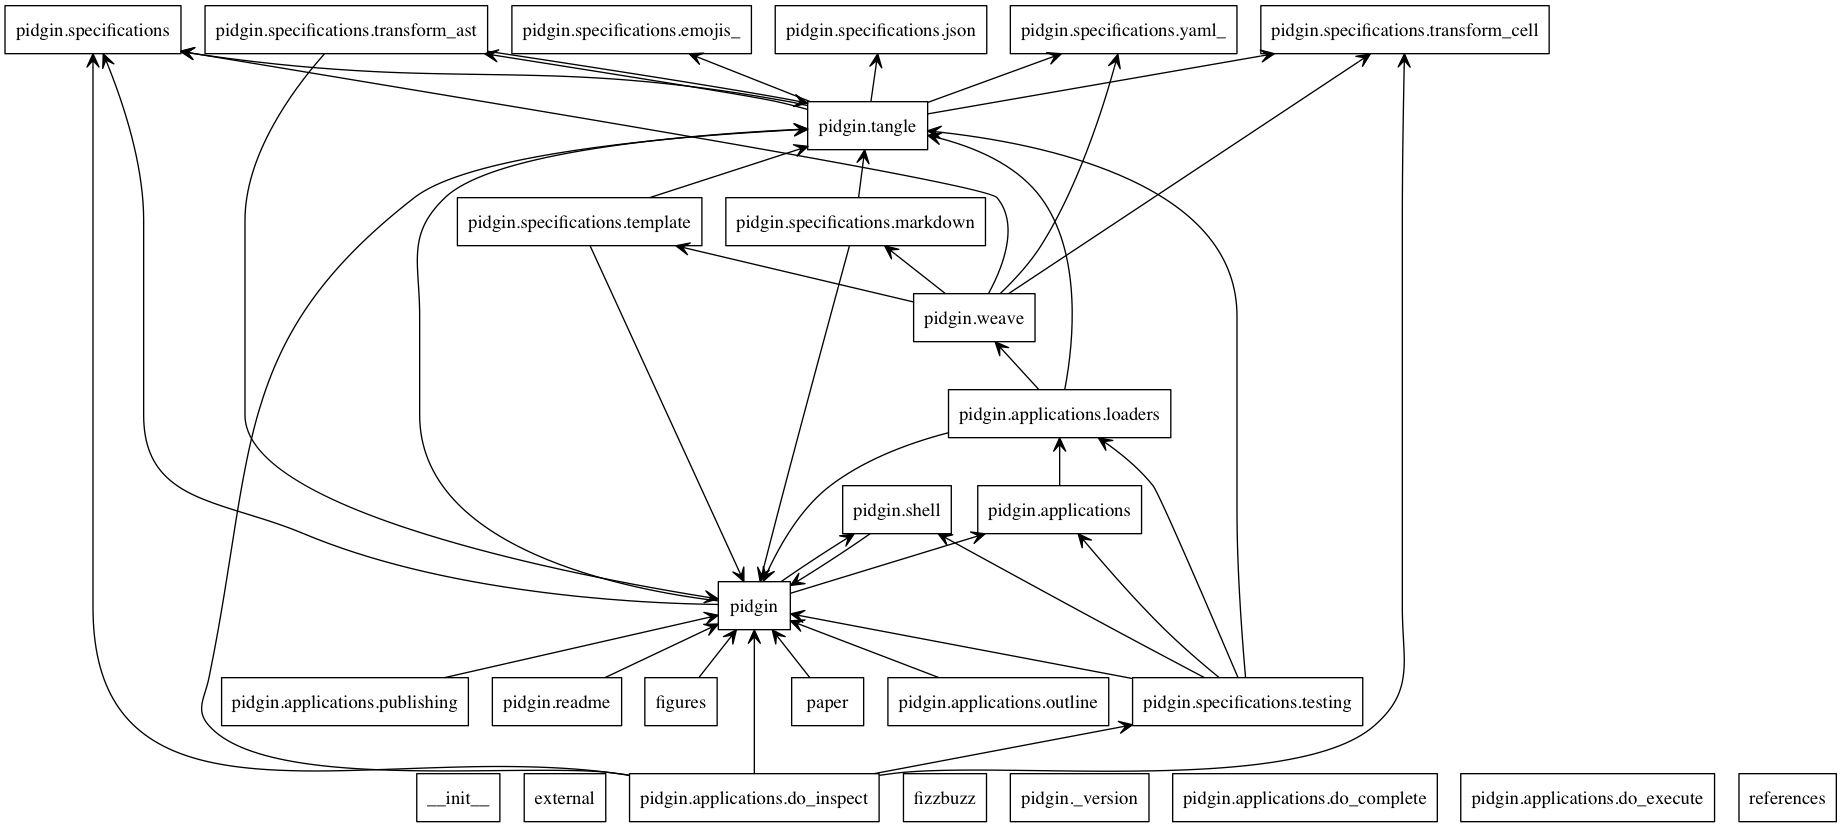

Error in callback <bound method Weave.run_cell of <pidgin.weave.Weave object at 0x10b262400>> (for post_run_cell):


AttributeError: 'Weave' object has no attribute 'output_list_item_end'

In [18]:
    files = []
    for file in Path(pidgin.__file__).parent.rglob('*.ipynb'):
        files.append(file.with_suffix('').with_suffix('').with_suffix('.py'))
        files[-1].write_text(
            nbconvert.PythonExporter(preprocessors=[pidgin.publishing.TanglePreProcessor()]).from_filename(file.absolute())[0].replace('F"', '"')
        )
    !source activate p6 && pyreverse pidgin -opng -ppidgin
    list(map(__import__('os').remove, files))
    return IPython.display.Image('classes_pidgin.png'), IPython.display.Image('packages_pidgin.png')



In [10]:
UML

In [11]:
    web_diagram=\
digraph {
    rankdir=LR
    WEB -> TEX [label=weave]
    WEB -> PAS [label=tangle]
    TEX -> DVI [label=typesetting]
    PAS -> REL [label=compile]
}

In [12]:
%%object web_implementation
{{web_diagram}}

The original WEB implementation of literate programming defined a bespoke file for the essay.  The file then may weave {{"graph{rankdir=LR WEB->TEX}"}} $or$ tangle {{"graph{rankdir=LR WEB->PASCAL}"}}

In [13]:
web_implementation

'{{web_diagram}}\n\nThe original WEB implementation of literate programming defined a bespoke file for the essay.  The file then may weave {{"graph{rankdir=LR WEB->TEX}"}} $or$ tangle {{"graph{rankdir=LR WEB->PASCAL}"}}\n\n'

In [14]:
    
    pidgin_diagram=\
digraph{
    rankdir=LR
    Jupyter -> pidgin
    pidgin -> Markdown [label=weave]
    pidgin -> IPython [label=tangle]
    Markdown -> display [label=typesetting]
    IPython -> Python [label=compile]
}
    
    pidgin_diagram

'digraph{\n    rankdir=LR\n    Jupyter -> pidgin\n    pidgin -> Markdown [label=weave]\n    pidgin -> IPython [label=tangle]\n    Markdown -> display [label=typesetting]\n    IPython -> Python [label=compile]\n}'

In [15]:
%%object pidgin_implementation
{{pidgin_diagram}}

Give special symbols to the source and object language.

1. {{'graph{rankdir=LR TEXT->MARKDOWN[label=read] MARKDOWN->IPYTHON[label=tangle] IPYTHON->PYTHON[label=INPUT] PYTHON->💩[label=compile]}'}}
2. {{'graph{rankdir=LR TEXT->MARKDOWN[label=display] MARKDOWN->"TEMPLATING ENGINE"->"FRONT MATTER"
     ->"TEMPLATING ENGINE"-> MARKDOWN->LEXER ->{
        DOCTEST INLINE "FENCED CODE" OTHER
    }-> RENDERER->HTML}'}}

Error: <stdin>: syntax error in line 1 near '->'


Error in callback <bound method Weave.run_cell of <pidgin.weave.Weave object at 0x10b262400>> (for post_run_cell):


CalledProcessError: Command '['dot', '-Tsvg']' returned non-zero exit status 1.